In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import string
from numpy import nan
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import scikitplot
from scipy.sparse import hstack

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.head()

,Unnamed: 0,Video Id,Title,Description,Category
0,0,ehmsJLZlCZ0,ep travelling through north east india off to ...,the journey to arunachal north east india begi...,travel
1,1,e2NQE41J5eM,how do i travel so much how do i earn money,subscribe mountaintrekker gimbal if you have a...,travel
2,2,i9E_Blai8vk,travel vlog welcome to bali priscilla lee,i had the chance to fly out to bali with my wh...,travel
3,3,-LzdIILq5vE,goa travel diary four days in goa travel outfi...,hope you enjoy my goa travel diary this video ...,travel
4,4,7ByoBJYXU0k,steps to becoming a travel blogger,travel blogger nikki vargas of the pin the map...,travel


### deviding the data into train test and validation using 80: 10 :10

In [7]:
title = data['Title']
count = 0 
for v in title:
    if type(v)!=str:
        title[count] = 'x'
    count+=1

In [8]:
words = []
for k in title:
    for word in k.split(' '):
        if word not in words:
            words.append(word) 

In [9]:
all_title = []
for k in title:
    for word in k.split(' '):
        all_title.append(word)

In [11]:
print("Total number of unique words in thhe dataset: ",len(words))
print("Total words in the dataset: ",len(all_title))

Total number of unique words in thhe dataset:  12671
Total words in the dataset:  77789


In [12]:
# initializing the dictionary with all unique values
dictionary = {}
for k in all_title:
        dictionary[k] = 0 

In [13]:
for k in all_title:
    dictionary[k] = dictionary[k]+1   # creating the dictionary from the given reviews

In [14]:
import operator
sorted_dict = sorted(dictionary.items(), key=operator.itemgetter(1))  # sorting the dictionary

In [16]:
sd = sorted_dict[::-1]   # containing all the words count in dec order

In [17]:
final_words = []
for word in sd:
    final_words.append(word[0])

In [21]:
new_title = []   # it will contain the numerical representation of the reviews
for f in title:
    l = []
    for k in f.split(' '):
        if k in final_words:
            ind = final_words.index(k)
            l.append(ind+1)
    new_title.append(l)

In [68]:
data['Category'].value_counts()

manufacturing             1736
travel                    1732
history                   1724
food                      1723
science and technology    1709
art and music             1709
Name: Category, dtype: int64

In [222]:
y = []
for cat in data['Category'].values:
    if cat=='manufacturing':
        y.append(0)
    elif cat =='travel':
        y.append(1)
    elif cat =='history':
        y.append(2)
    elif cat=='food':
        y.append(3)
    elif cat=='science and technology':
        y.append(4)
    else:
        y.append(5)

In [223]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(new_title,y, test_size=.1)
X_train1,X_cv1,y_train1,y_cv1 = train_test_split(X_train1,y_train1, test_size=.1)

In [224]:
y = pd.get_dummies(y).values

In [225]:
X_train,X_test,y_train,y_test = train_test_split(new_title,y, test_size=.1)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train, test_size=.1)

### applying Logistic Regression over the title:

In [226]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score

In [227]:
# padding the dataset
from keras.preprocessing import sequence
max_review_length = 600
x_train=sequence.pad_sequences(X_train,maxlen=max_review_length)
x_test=sequence.pad_sequences(X_test,maxlen=max_review_length)
#x_train=sequence.pad_sequences(X_train,maxlen=max_review_length)
x_cv=sequence.pad_sequences(X_cv,maxlen=max_review_length)
print("Training data Shape",x_train.shape)

Training data Shape (8369, 600)


In [149]:
embedding_vecor_length=100

In [150]:
import numpy
#from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
# fix random seed for reproducibility
numpy.random.seed(7)

In [151]:
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=len(x_train[0])))
model.add(Dropout(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 50, 100)           1267200   
_________________________________________________________________
dropout_18 (Dropout)         (None, 50, 100)           0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 606       
Total params: 1,348,206
Trainable params: 1,348,206
Non-trainable params: 0
_________________________________________________________________
None


In [132]:
y_train = np.array(y_train)

In [133]:
epochs = 5
batch_size = 64
history = model.fit(x_train, y_train, nb_epoch=10, batch_size=64,validation_data=(x_test,y_test))

Train on 8369 samples, validate on 1034 samples
Epoch 1/10
8369/8369 [==============================] - ETA: 4:51 - loss: 1.7911 - accuracy: 0.14 - ETA: 3:49 - loss: 1.7919 - accuracy: 0.14 - ETA: 3:33 - loss: 1.7919 - accuracy: 0.14 - ETA: 3:25 - loss: 1.7923 - accuracy: 0.13 - ETA: 3:17 - loss: 1.7925 - accuracy: 0.13 - ETA: 3:10 - loss: 1.7929 - accuracy: 0.12 - ETA: 3:04 - loss: 1.7927 - accuracy: 0.13 - ETA: 3:01 - loss: 1.7929 - accuracy: 0.13 - ETA: 2:57 - loss: 1.7930 - accuracy: 0.12 - ETA: 2:55 - loss: 1.7927 - accuracy: 0.13 - ETA: 2:52 - loss: 1.7924 - accuracy: 0.14 - ETA: 2:49 - loss: 1.7925 - accuracy: 0.14 - ETA: 2:47 - loss: 1.7923 - accuracy: 0.14 - ETA: 2:45 - loss: 1.7924 - accuracy: 0.14 - ETA: 2:43 - loss: 1.7927 - accuracy: 0.14 - ETA: 2:42 - loss: 1.7928 - accuracy: 0.14 - ETA: 2:40 - loss: 1.7928 - accuracy: 0.14 - ETA: 2:40 - loss: 1.7930 - accuracy: 0.14 - ETA: 2:39 - loss: 1.7928 - accuracy: 0.14 - ETA: 2:38 - loss: 1.7928 - accuracy: 0.14 - ETA: 2:36 - loss

8369/8369 [==============================] - ETA: 3:12 - loss: 1.7877 - accuracy: 0.23 - ETA: 3:02 - loss: 1.7855 - accuracy: 0.25 - ETA: 2:59 - loss: 1.7863 - accuracy: 0.25 - ETA: 2:58 - loss: 1.7864 - accuracy: 0.23 - ETA: 3:00 - loss: 1.7874 - accuracy: 0.25 - ETA: 2:59 - loss: 1.7873 - accuracy: 0.25 - ETA: 2:57 - loss: 1.7877 - accuracy: 0.24 - ETA: 2:55 - loss: 1.7873 - accuracy: 0.25 - ETA: 2:54 - loss: 1.7872 - accuracy: 0.25 - ETA: 2:53 - loss: 1.7868 - accuracy: 0.26 - ETA: 2:51 - loss: 1.7863 - accuracy: 0.28 - ETA: 2:49 - loss: 1.7863 - accuracy: 0.28 - ETA: 2:48 - loss: 1.7865 - accuracy: 0.27 - ETA: 2:46 - loss: 1.7866 - accuracy: 0.27 - ETA: 2:45 - loss: 1.7867 - accuracy: 0.27 - ETA: 2:44 - loss: 1.7866 - accuracy: 0.26 - ETA: 2:42 - loss: 1.7865 - accuracy: 0.27 - ETA: 2:40 - loss: 1.7864 - accuracy: 0.27 - ETA: 2:39 - loss: 1.7864 - accuracy: 0.26 - ETA: 2:37 - loss: 1.7865 - accuracy: 0.26 - ETA: 2:36 - loss: 1.7862 - accuracy: 0.26 - ETA: 2:34 - loss: 1.7861 - accu

8369/8369 [==============================] - ETA: 3:10 - loss: 1.7052 - accuracy: 0.37 - ETA: 3:02 - loss: 1.6735 - accuracy: 0.47 - ETA: 3:02 - loss: 1.7048 - accuracy: 0.44 - ETA: 3:01 - loss: 1.7036 - accuracy: 0.43 - ETA: 2:59 - loss: 1.7075 - accuracy: 0.41 - ETA: 2:57 - loss: 1.7039 - accuracy: 0.41 - ETA: 2:55 - loss: 1.7019 - accuracy: 0.41 - ETA: 2:55 - loss: 1.6960 - accuracy: 0.41 - ETA: 2:55 - loss: 1.6976 - accuracy: 0.39 - ETA: 2:53 - loss: 1.6996 - accuracy: 0.39 - ETA: 2:51 - loss: 1.7061 - accuracy: 0.37 - ETA: 2:50 - loss: 1.7158 - accuracy: 0.35 - ETA: 2:49 - loss: 1.7357 - accuracy: 0.33 - ETA: 2:47 - loss: 1.7526 - accuracy: 0.32 - ETA: 2:45 - loss: 1.7630 - accuracy: 0.31 - ETA: 2:44 - loss: 1.7644 - accuracy: 0.31 - ETA: 2:43 - loss: 1.7716 - accuracy: 0.30 - ETA: 2:41 - loss: 1.7708 - accuracy: 0.30 - ETA: 2:40 - loss: 1.7712 - accuracy: 0.30 - ETA: 2:38 - loss: 1.7711 - accuracy: 0.29 - ETA: 2:36 - loss: 1.7681 - accuracy: 0.29 - ETA: 2:35 - loss: 1.7625 - accu

8369/8369 [==============================] - ETA: 3:02 - loss: 1.3666 - accuracy: 0.54 - ETA: 3:02 - loss: 1.3941 - accuracy: 0.56 - ETA: 3:03 - loss: 1.4216 - accuracy: 0.54 - ETA: 3:03 - loss: 1.4232 - accuracy: 0.55 - ETA: 3:02 - loss: 1.4217 - accuracy: 0.55 - ETA: 3:00 - loss: 1.4152 - accuracy: 0.55 - ETA: 2:58 - loss: 1.4132 - accuracy: 0.55 - ETA: 2:56 - loss: 1.4243 - accuracy: 0.53 - ETA: 2:55 - loss: 1.4182 - accuracy: 0.54 - ETA: 2:54 - loss: 1.4129 - accuracy: 0.54 - ETA: 2:52 - loss: 1.4162 - accuracy: 0.54 - ETA: 2:50 - loss: 1.4147 - accuracy: 0.54 - ETA: 2:49 - loss: 1.4143 - accuracy: 0.53 - ETA: 2:48 - loss: 1.4122 - accuracy: 0.54 - ETA: 2:47 - loss: 1.4109 - accuracy: 0.54 - ETA: 2:45 - loss: 1.4015 - accuracy: 0.53 - ETA: 2:44 - loss: 1.4066 - accuracy: 0.52 - ETA: 2:42 - loss: 1.4068 - accuracy: 0.52 - ETA: 2:41 - loss: 1.4108 - accuracy: 0.52 - ETA: 2:40 - loss: 1.4046 - accuracy: 0.52 - ETA: 2:39 - loss: 1.4028 - accuracy: 0.52 - ETA: 2:37 - loss: 1.4062 - accu

8369/8369 [==============================] - ETA: 2:59 - loss: 1.1133 - accuracy: 0.60 - ETA: 3:01 - loss: 1.0709 - accuracy: 0.65 - ETA: 3:07 - loss: 1.0869 - accuracy: 0.64 - ETA: 3:08 - loss: 1.1010 - accuracy: 0.62 - ETA: 3:06 - loss: 1.1129 - accuracy: 0.62 - ETA: 3:05 - loss: 1.1128 - accuracy: 0.63 - ETA: 3:04 - loss: 1.1041 - accuracy: 0.63 - ETA: 3:04 - loss: 1.1213 - accuracy: 0.63 - ETA: 3:03 - loss: 1.1183 - accuracy: 0.63 - ETA: 3:01 - loss: 1.1234 - accuracy: 0.63 - ETA: 3:00 - loss: 1.1116 - accuracy: 0.63 - ETA: 3:00 - loss: 1.0999 - accuracy: 0.64 - ETA: 2:59 - loss: 1.1065 - accuracy: 0.63 - ETA: 2:58 - loss: 1.1003 - accuracy: 0.63 - ETA: 2:56 - loss: 1.1002 - accuracy: 0.63 - ETA: 2:54 - loss: 1.1091 - accuracy: 0.62 - ETA: 2:52 - loss: 1.1150 - accuracy: 0.62 - ETA: 2:50 - loss: 1.1218 - accuracy: 0.62 - ETA: 2:49 - loss: 1.1267 - accuracy: 0.62 - ETA: 2:47 - loss: 1.1204 - accuracy: 0.62 - ETA: 2:45 - loss: 1.1221 - accuracy: 0.62 - ETA: 2:43 - loss: 1.1226 - accu

8369/8369 [==============================] - ETA: 3:22 - loss: 0.8452 - accuracy: 0.75 - ETA: 3:13 - loss: 0.8738 - accuracy: 0.72 - ETA: 3:10 - loss: 0.8771 - accuracy: 0.72 - ETA: 3:10 - loss: 0.8916 - accuracy: 0.72 - ETA: 3:09 - loss: 0.9079 - accuracy: 0.70 - ETA: 3:07 - loss: 0.9081 - accuracy: 0.70 - ETA: 3:06 - loss: 0.9058 - accuracy: 0.69 - ETA: 3:03 - loss: 0.8971 - accuracy: 0.70 - ETA: 3:02 - loss: 0.8940 - accuracy: 0.69 - ETA: 3:01 - loss: 0.8994 - accuracy: 0.69 - ETA: 2:59 - loss: 0.8890 - accuracy: 0.69 - ETA: 2:58 - loss: 0.8782 - accuracy: 0.69 - ETA: 2:56 - loss: 0.8874 - accuracy: 0.69 - ETA: 2:55 - loss: 0.8867 - accuracy: 0.69 - ETA: 2:53 - loss: 0.8918 - accuracy: 0.70 - ETA: 2:52 - loss: 0.8965 - accuracy: 0.69 - ETA: 2:50 - loss: 0.8869 - accuracy: 0.69 - ETA: 2:48 - loss: 0.8819 - accuracy: 0.69 - ETA: 2:47 - loss: 0.8840 - accuracy: 0.69 - ETA: 2:46 - loss: 0.8842 - accuracy: 0.69 - ETA: 2:44 - loss: 0.8765 - accuracy: 0.69 - ETA: 2:42 - loss: 0.8764 - accu

8369/8369 [==============================] - ETA: 3:17 - loss: 0.7149 - accuracy: 0.76 - ETA: 3:14 - loss: 0.6943 - accuracy: 0.76 - ETA: 3:10 - loss: 0.6889 - accuracy: 0.78 - ETA: 3:08 - loss: 0.6947 - accuracy: 0.78 - ETA: 3:07 - loss: 0.7168 - accuracy: 0.76 - ETA: 3:06 - loss: 0.7365 - accuracy: 0.75 - ETA: 3:03 - loss: 0.7676 - accuracy: 0.72 - ETA: 3:01 - loss: 0.7641 - accuracy: 0.72 - ETA: 3:00 - loss: 0.7555 - accuracy: 0.72 - ETA: 2:59 - loss: 0.7553 - accuracy: 0.72 - ETA: 2:57 - loss: 0.7556 - accuracy: 0.72 - ETA: 2:56 - loss: 0.7458 - accuracy: 0.73 - ETA: 2:54 - loss: 0.7402 - accuracy: 0.73 - ETA: 2:53 - loss: 0.7417 - accuracy: 0.73 - ETA: 2:52 - loss: 0.7547 - accuracy: 0.72 - ETA: 2:50 - loss: 0.7501 - accuracy: 0.72 - ETA: 2:48 - loss: 0.7527 - accuracy: 0.72 - ETA: 2:47 - loss: 0.7527 - accuracy: 0.73 - ETA: 2:46 - loss: 0.7506 - accuracy: 0.73 - ETA: 2:44 - loss: 0.7505 - accuracy: 0.73 - ETA: 2:43 - loss: 0.7528 - accuracy: 0.73 - ETA: 2:41 - loss: 0.7470 - accu

8369/8369 [==============================] - ETA: 3:20 - loss: 0.5895 - accuracy: 0.79 - ETA: 3:13 - loss: 0.5858 - accuracy: 0.78 - ETA: 3:11 - loss: 0.6309 - accuracy: 0.78 - ETA: 3:08 - loss: 0.6679 - accuracy: 0.77 - ETA: 3:06 - loss: 0.6441 - accuracy: 0.78 - ETA: 3:06 - loss: 0.6718 - accuracy: 0.77 - ETA: 3:04 - loss: 0.6809 - accuracy: 0.77 - ETA: 3:02 - loss: 0.6721 - accuracy: 0.77 - ETA: 3:01 - loss: 0.6626 - accuracy: 0.77 - ETA: 3:00 - loss: 0.6507 - accuracy: 0.77 - ETA: 2:58 - loss: 0.6638 - accuracy: 0.77 - ETA: 2:57 - loss: 0.6812 - accuracy: 0.76 - ETA: 2:55 - loss: 0.6772 - accuracy: 0.76 - ETA: 2:54 - loss: 0.6685 - accuracy: 0.76 - ETA: 2:53 - loss: 0.6737 - accuracy: 0.76 - ETA: 2:51 - loss: 0.6690 - accuracy: 0.76 - ETA: 2:50 - loss: 0.6695 - accuracy: 0.76 - ETA: 2:48 - loss: 0.6816 - accuracy: 0.76 - ETA: 2:46 - loss: 0.6838 - accuracy: 0.75 - ETA: 2:45 - loss: 0.6772 - accuracy: 0.76 - ETA: 2:44 - loss: 0.6806 - accuracy: 0.76 - ETA: 2:42 - loss: 0.6750 - accu

8369/8369 [==============================] - ETA: 3:15 - loss: 0.6308 - accuracy: 0.76 - ETA: 3:15 - loss: 0.6958 - accuracy: 0.73 - ETA: 3:10 - loss: 0.6846 - accuracy: 0.74 - ETA: 3:07 - loss: 0.6821 - accuracy: 0.74 - ETA: 3:07 - loss: 0.6674 - accuracy: 0.75 - ETA: 3:07 - loss: 0.6547 - accuracy: 0.76 - ETA: 3:06 - loss: 0.6517 - accuracy: 0.76 - ETA: 3:04 - loss: 0.6345 - accuracy: 0.77 - ETA: 3:01 - loss: 0.6254 - accuracy: 0.77 - ETA: 3:00 - loss: 0.6276 - accuracy: 0.77 - ETA: 2:59 - loss: 0.6323 - accuracy: 0.77 - ETA: 2:57 - loss: 0.6332 - accuracy: 0.77 - ETA: 2:56 - loss: 0.6320 - accuracy: 0.76 - ETA: 2:54 - loss: 0.6433 - accuracy: 0.76 - ETA: 2:53 - loss: 0.6377 - accuracy: 0.76 - ETA: 2:52 - loss: 0.6321 - accuracy: 0.76 - ETA: 2:50 - loss: 0.6297 - accuracy: 0.77 - ETA: 2:48 - loss: 0.6210 - accuracy: 0.77 - ETA: 2:47 - loss: 0.6229 - accuracy: 0.77 - ETA: 2:45 - loss: 0.6231 - accuracy: 0.77 - ETA: 2:44 - loss: 0.6214 - accuracy: 0.77 - ETA: 2:42 - loss: 0.6206 - accu

8369/8369 [==============================] - ETA: 3:12 - loss: 0.7096 - accuracy: 0.70 - ETA: 3:17 - loss: 0.6066 - accuracy: 0.75 - ETA: 3:12 - loss: 0.5590 - accuracy: 0.79 - ETA: 3:08 - loss: 0.5742 - accuracy: 0.78 - ETA: 3:07 - loss: 0.5774 - accuracy: 0.78 - ETA: 3:07 - loss: 0.5740 - accuracy: 0.77 - ETA: 3:05 - loss: 0.5991 - accuracy: 0.75 - ETA: 3:04 - loss: 0.5860 - accuracy: 0.76 - ETA: 3:02 - loss: 0.5755 - accuracy: 0.77 - ETA: 3:00 - loss: 0.5879 - accuracy: 0.77 - ETA: 3:00 - loss: 0.5796 - accuracy: 0.78 - ETA: 2:58 - loss: 0.5716 - accuracy: 0.78 - ETA: 2:56 - loss: 0.5759 - accuracy: 0.78 - ETA: 2:55 - loss: 0.5669 - accuracy: 0.78 - ETA: 2:53 - loss: 0.5620 - accuracy: 0.78 - ETA: 2:52 - loss: 0.5546 - accuracy: 0.78 - ETA: 2:51 - loss: 0.5498 - accuracy: 0.79 - ETA: 2:49 - loss: 0.5598 - accuracy: 0.78 - ETA: 2:47 - loss: 0.5555 - accuracy: 0.78 - ETA: 2:46 - loss: 0.5615 - accuracy: 0.78 - ETA: 2:44 - loss: 0.5642 - accuracy: 0.78 - ETA: 2:43 - loss: 0.5684 - accu

In [303]:
# tsking top 5000 points
top_10000 = []
count = 0
for d in sd:
    if count ==10000:
        break
    top_10000.append(d)
    count = count+1

In [304]:
final_words = []
for word in top_10000:
    final_words.append(word[0])

In [305]:
new_reviews = []   # it will contain the numerical representation of the titles
for f in title:
    l = []
    for k in f.split(' '):
        if k in final_words:
            ind = final_words.index(k)
            l.append(ind+1)
    new_reviews.append(l)

In [306]:
X_train,X_test,y_train,y_test = train_test_split(new_reviews,y, test_size=.1)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train, test_size=.1)

In [307]:
# padding the dataset
from keras.preprocessing import sequence
from keras.optimizers import Adagrad
max_review_length = 60
x_train=sequence.pad_sequences(X_train,maxlen=max_review_length)
x_test=sequence.pad_sequences(X_test,maxlen=max_review_length)
#x_train=sequence.pad_sequences(X_train,maxlen=max_review_length)
x_cv=sequence.pad_sequences(X_cv,maxlen=max_review_length)
print("Training data Shape",x_train.shape)

Training data Shape (8369, 60)


In [308]:
model = Sequential()
model.add(Embedding(10001, embedding_vecor_length, input_length=len(x_train[0])))
model.add(Dropout(0.3))
model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.3,return_sequences=True))
model.add(LSTM(32, dropout=0.4, recurrent_dropout=0.3))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adagrad(learning_rate = .01), metrics=['accuracy'])
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 60, 100)           1000100   
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 60, 128)           117248    
_________________________________________________________________
lstm_35 (LSTM)               (None, 32)                20608     
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 198       
Total params: 1,138,154
Trainable params: 1,138,154
Non-trainable params: 0
_________________________________________________________________
None


In [309]:
epochs = 5
batch_size = 64
history = model.fit(x_train, y_train, nb_epoch = 10, batch_size=64,validation_data=(x_test,y_test))

Train on 8369 samples, validate on 1034 samples
Epoch 1/10
8369/8369 [==============================] - ETA: 1:40 - loss: 1.7955 - accuracy: 0.14 - ETA: 1:07 - loss: 1.7936 - accuracy: 0.15 - ETA: 55s - loss: 1.8015 - accuracy: 0.1667 - ETA: 49s - loss: 1.7972 - accuracy: 0.175 - ETA: 45s - loss: 1.7964 - accuracy: 0.175 - ETA: 42s - loss: 1.7971 - accuracy: 0.177 - ETA: 40s - loss: 1.7930 - accuracy: 0.189 - ETA: 39s - loss: 1.7878 - accuracy: 0.195 - ETA: 38s - loss: 1.7844 - accuracy: 0.206 - ETA: 37s - loss: 1.7796 - accuracy: 0.217 - ETA: 36s - loss: 1.7777 - accuracy: 0.221 - ETA: 35s - loss: 1.7767 - accuracy: 0.220 - ETA: 34s - loss: 1.7724 - accuracy: 0.229 - ETA: 34s - loss: 1.7663 - accuracy: 0.246 - ETA: 33s - loss: 1.7596 - accuracy: 0.259 - ETA: 33s - loss: 1.7534 - accuracy: 0.273 - ETA: 32s - loss: 1.7460 - accuracy: 0.275 - ETA: 32s - loss: 1.7363 - accuracy: 0.286 - ETA: 31s - loss: 1.7272 - accuracy: 0.300 - ETA: 31s - loss: 1.7178 - accuracy: 0.312 - ETA: 30s - loss

8369/8369 [==============================] - ETA: 34s - loss: 0.2840 - accuracy: 0.921 - ETA: 33s - loss: 0.2151 - accuracy: 0.937 - ETA: 33s - loss: 0.1803 - accuracy: 0.953 - ETA: 32s - loss: 0.1695 - accuracy: 0.960 - ETA: 32s - loss: 0.1497 - accuracy: 0.965 - ETA: 33s - loss: 0.1632 - accuracy: 0.960 - ETA: 32s - loss: 0.1534 - accuracy: 0.966 - ETA: 32s - loss: 0.1532 - accuracy: 0.966 - ETA: 32s - loss: 0.1500 - accuracy: 0.965 - ETA: 32s - loss: 0.1582 - accuracy: 0.964 - ETA: 32s - loss: 0.1538 - accuracy: 0.965 - ETA: 31s - loss: 0.1554 - accuracy: 0.967 - ETA: 31s - loss: 0.1638 - accuracy: 0.967 - ETA: 31s - loss: 0.1645 - accuracy: 0.966 - ETA: 31s - loss: 0.1591 - accuracy: 0.967 - ETA: 30s - loss: 0.1569 - accuracy: 0.967 - ETA: 30s - loss: 0.1570 - accuracy: 0.967 - ETA: 30s - loss: 0.1574 - accuracy: 0.968 - ETA: 30s - loss: 0.1566 - accuracy: 0.968 - ETA: 29s - loss: 0.1558 - accuracy: 0.969 - ETA: 29s - loss: 0.1591 - accuracy: 0.968 - ETA: 29s - loss: 0.1584 - accur

8369/8369 [==============================] - ETA: 36s - loss: 0.2144 - accuracy: 0.921 - ETA: 35s - loss: 0.1281 - accuracy: 0.960 - ETA: 36s - loss: 0.1244 - accuracy: 0.963 - ETA: 35s - loss: 0.1164 - accuracy: 0.968 - ETA: 36s - loss: 0.1173 - accuracy: 0.971 - ETA: 35s - loss: 0.1126 - accuracy: 0.968 - ETA: 35s - loss: 0.1039 - accuracy: 0.971 - ETA: 34s - loss: 0.1206 - accuracy: 0.970 - ETA: 34s - loss: 0.1129 - accuracy: 0.974 - ETA: 34s - loss: 0.1078 - accuracy: 0.975 - ETA: 33s - loss: 0.1033 - accuracy: 0.977 - ETA: 33s - loss: 0.0976 - accuracy: 0.979 - ETA: 33s - loss: 0.0929 - accuracy: 0.980 - ETA: 33s - loss: 0.0941 - accuracy: 0.978 - ETA: 32s - loss: 0.0910 - accuracy: 0.980 - ETA: 32s - loss: 0.0929 - accuracy: 0.979 - ETA: 32s - loss: 0.0888 - accuracy: 0.980 - ETA: 31s - loss: 0.0860 - accuracy: 0.981 - ETA: 31s - loss: 0.0843 - accuracy: 0.982 - ETA: 30s - loss: 0.0813 - accuracy: 0.983 - ETA: 30s - loss: 0.0803 - accuracy: 0.983 - ETA: 30s - loss: 0.0779 - accur

8369/8369 [==============================] - ETA: 33s - loss: 0.0343 - accuracy: 1.000 - ETA: 33s - loss: 0.0254 - accuracy: 1.000 - ETA: 32s - loss: 0.0257 - accuracy: 1.000 - ETA: 32s - loss: 0.0514 - accuracy: 0.988 - ETA: 32s - loss: 0.0472 - accuracy: 0.990 - ETA: 31s - loss: 0.0472 - accuracy: 0.989 - ETA: 31s - loss: 0.0520 - accuracy: 0.988 - ETA: 31s - loss: 0.0491 - accuracy: 0.990 - ETA: 31s - loss: 0.0474 - accuracy: 0.991 - ETA: 30s - loss: 0.0440 - accuracy: 0.992 - ETA: 30s - loss: 0.0422 - accuracy: 0.992 - ETA: 30s - loss: 0.0424 - accuracy: 0.992 - ETA: 30s - loss: 0.0413 - accuracy: 0.992 - ETA: 29s - loss: 0.0417 - accuracy: 0.992 - ETA: 29s - loss: 0.0510 - accuracy: 0.990 - ETA: 29s - loss: 0.0506 - accuracy: 0.990 - ETA: 28s - loss: 0.0484 - accuracy: 0.990 - ETA: 28s - loss: 0.0497 - accuracy: 0.989 - ETA: 28s - loss: 0.0487 - accuracy: 0.990 - ETA: 28s - loss: 0.0497 - accuracy: 0.989 - ETA: 27s - loss: 0.0484 - accuracy: 0.990 - ETA: 27s - loss: 0.0478 - accur

8369/8369 [==============================] - ETA: 32s - loss: 0.0174 - accuracy: 1.000 - ETA: 32s - loss: 0.0542 - accuracy: 0.976 - ETA: 32s - loss: 0.0610 - accuracy: 0.979 - ETA: 31s - loss: 0.0511 - accuracy: 0.984 - ETA: 31s - loss: 0.0448 - accuracy: 0.987 - ETA: 31s - loss: 0.0399 - accuracy: 0.989 - ETA: 31s - loss: 0.0394 - accuracy: 0.991 - ETA: 31s - loss: 0.0366 - accuracy: 0.992 - ETA: 30s - loss: 0.0346 - accuracy: 0.993 - ETA: 30s - loss: 0.0330 - accuracy: 0.993 - ETA: 30s - loss: 0.0345 - accuracy: 0.992 - ETA: 30s - loss: 0.0341 - accuracy: 0.993 - ETA: 29s - loss: 0.0406 - accuracy: 0.992 - ETA: 29s - loss: 0.0391 - accuracy: 0.992 - ETA: 29s - loss: 0.0374 - accuracy: 0.992 - ETA: 29s - loss: 0.0363 - accuracy: 0.993 - ETA: 28s - loss: 0.0355 - accuracy: 0.993 - ETA: 28s - loss: 0.0358 - accuracy: 0.993 - ETA: 28s - loss: 0.0343 - accuracy: 0.993 - ETA: 28s - loss: 0.0331 - accuracy: 0.993 - ETA: 27s - loss: 0.0321 - accuracy: 0.994 - ETA: 27s - loss: 0.0317 - accur

8369/8369 [==============================] - ETA: 34s - loss: 0.0147 - accuracy: 1.000 - ETA: 33s - loss: 0.0116 - accuracy: 1.000 - ETA: 34s - loss: 0.0106 - accuracy: 1.000 - ETA: 34s - loss: 0.0236 - accuracy: 0.992 - ETA: 33s - loss: 0.0213 - accuracy: 0.993 - ETA: 33s - loss: 0.0267 - accuracy: 0.992 - ETA: 32s - loss: 0.0396 - accuracy: 0.986 - ETA: 32s - loss: 0.0393 - accuracy: 0.988 - ETA: 32s - loss: 0.0393 - accuracy: 0.987 - ETA: 32s - loss: 0.0365 - accuracy: 0.989 - ETA: 31s - loss: 0.0345 - accuracy: 0.990 - ETA: 32s - loss: 0.0401 - accuracy: 0.989 - ETA: 32s - loss: 0.0378 - accuracy: 0.990 - ETA: 32s - loss: 0.0362 - accuracy: 0.991 - ETA: 31s - loss: 0.0359 - accuracy: 0.990 - ETA: 31s - loss: 0.0379 - accuracy: 0.990 - ETA: 31s - loss: 0.0370 - accuracy: 0.990 - ETA: 31s - loss: 0.0386 - accuracy: 0.990 - ETA: 30s - loss: 0.0372 - accuracy: 0.991 - ETA: 30s - loss: 0.0377 - accuracy: 0.990 - ETA: 29s - loss: 0.0363 - accuracy: 0.991 - ETA: 29s - loss: 0.0351 - accur

8369/8369 [==============================] - ETA: 32s - loss: 0.0431 - accuracy: 0.984 - ETA: 32s - loss: 0.0259 - accuracy: 0.992 - ETA: 32s - loss: 0.0219 - accuracy: 0.994 - ETA: 31s - loss: 0.0261 - accuracy: 0.992 - ETA: 31s - loss: 0.0222 - accuracy: 0.993 - ETA: 31s - loss: 0.0366 - accuracy: 0.989 - ETA: 31s - loss: 0.0335 - accuracy: 0.991 - ETA: 30s - loss: 0.0308 - accuracy: 0.992 - ETA: 30s - loss: 0.0286 - accuracy: 0.993 - ETA: 30s - loss: 0.0272 - accuracy: 0.993 - ETA: 30s - loss: 0.0315 - accuracy: 0.992 - ETA: 29s - loss: 0.0306 - accuracy: 0.993 - ETA: 29s - loss: 0.0315 - accuracy: 0.992 - ETA: 29s - loss: 0.0301 - accuracy: 0.993 - ETA: 29s - loss: 0.0308 - accuracy: 0.992 - ETA: 28s - loss: 0.0292 - accuracy: 0.993 - ETA: 28s - loss: 0.0329 - accuracy: 0.992 - ETA: 28s - loss: 0.0326 - accuracy: 0.992 - ETA: 28s - loss: 0.0312 - accuracy: 0.992 - ETA: 27s - loss: 0.0303 - accuracy: 0.993 - ETA: 27s - loss: 0.0296 - accuracy: 0.993 - ETA: 27s - loss: 0.0294 - accur

8369/8369 [==============================] - ETA: 41s - loss: 0.0089 - accuracy: 1.000 - ETA: 37s - loss: 0.0081 - accuracy: 1.000 - ETA: 35s - loss: 0.0100 - accuracy: 1.000 - ETA: 34s - loss: 0.0106 - accuracy: 1.000 - ETA: 33s - loss: 0.0102 - accuracy: 1.000 - ETA: 33s - loss: 0.0110 - accuracy: 1.000 - ETA: 32s - loss: 0.0311 - accuracy: 0.993 - ETA: 32s - loss: 0.0374 - accuracy: 0.992 - ETA: 32s - loss: 0.0341 - accuracy: 0.993 - ETA: 32s - loss: 0.0319 - accuracy: 0.993 - ETA: 32s - loss: 0.0301 - accuracy: 0.994 - ETA: 32s - loss: 0.0324 - accuracy: 0.993 - ETA: 31s - loss: 0.0308 - accuracy: 0.994 - ETA: 31s - loss: 0.0291 - accuracy: 0.994 - ETA: 31s - loss: 0.0280 - accuracy: 0.994 - ETA: 31s - loss: 0.0290 - accuracy: 0.994 - ETA: 31s - loss: 0.0337 - accuracy: 0.991 - ETA: 30s - loss: 0.0325 - accuracy: 0.992 - ETA: 30s - loss: 0.0320 - accuracy: 0.992 - ETA: 30s - loss: 0.0308 - accuracy: 0.993 - ETA: 30s - loss: 0.0385 - accuracy: 0.991 - ETA: 29s - loss: 0.0372 - accur

8369/8369 [==============================] - ETA: 33s - loss: 0.0429 - accuracy: 0.984 - ETA: 33s - loss: 0.0315 - accuracy: 0.984 - ETA: 32s - loss: 0.0241 - accuracy: 0.989 - ETA: 33s - loss: 0.0228 - accuracy: 0.992 - ETA: 34s - loss: 0.0206 - accuracy: 0.993 - ETA: 33s - loss: 0.0194 - accuracy: 0.994 - ETA: 33s - loss: 0.0181 - accuracy: 0.995 - ETA: 32s - loss: 0.0170 - accuracy: 0.996 - ETA: 32s - loss: 0.0165 - accuracy: 0.996 - ETA: 32s - loss: 0.0251 - accuracy: 0.995 - ETA: 31s - loss: 0.0242 - accuracy: 0.995 - ETA: 31s - loss: 0.0261 - accuracy: 0.994 - ETA: 30s - loss: 0.0317 - accuracy: 0.994 - ETA: 30s - loss: 0.0307 - accuracy: 0.994 - ETA: 30s - loss: 0.0290 - accuracy: 0.994 - ETA: 29s - loss: 0.0285 - accuracy: 0.994 - ETA: 29s - loss: 0.0272 - accuracy: 0.994 - ETA: 29s - loss: 0.0263 - accuracy: 0.994 - ETA: 28s - loss: 0.0264 - accuracy: 0.994 - ETA: 28s - loss: 0.0288 - accuracy: 0.993 - ETA: 28s - loss: 0.0285 - accuracy: 0.992 - ETA: 28s - loss: 0.0283 - accur

8369/8369 [==============================] - ETA: 32s - loss: 0.0189 - accuracy: 0.984 - ETA: 32s - loss: 0.0147 - accuracy: 0.992 - ETA: 32s - loss: 0.0117 - accuracy: 0.994 - ETA: 31s - loss: 0.0136 - accuracy: 0.996 - ETA: 31s - loss: 0.0244 - accuracy: 0.993 - ETA: 31s - loss: 0.0291 - accuracy: 0.989 - ETA: 30s - loss: 0.0256 - accuracy: 0.991 - ETA: 30s - loss: 0.0296 - accuracy: 0.990 - ETA: 30s - loss: 0.0273 - accuracy: 0.991 - ETA: 30s - loss: 0.0275 - accuracy: 0.990 - ETA: 29s - loss: 0.0268 - accuracy: 0.991 - ETA: 29s - loss: 0.0250 - accuracy: 0.992 - ETA: 29s - loss: 0.0239 - accuracy: 0.992 - ETA: 29s - loss: 0.0229 - accuracy: 0.993 - ETA: 29s - loss: 0.0229 - accuracy: 0.992 - ETA: 28s - loss: 0.0243 - accuracy: 0.992 - ETA: 28s - loss: 0.0232 - accuracy: 0.992 - ETA: 28s - loss: 0.0223 - accuracy: 0.993 - ETA: 27s - loss: 0.0214 - accuracy: 0.993 - ETA: 27s - loss: 0.0237 - accuracy: 0.993 - ETA: 27s - loss: 0.0228 - accuracy: 0.993 - ETA: 27s - loss: 0.0219 - accur

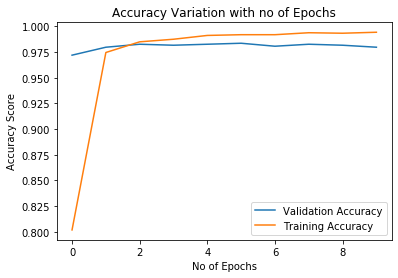

In [310]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(["Validation Accuracy","Training Accuracy"])
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Variation with no of Epochs")
plt.show()

In [230]:
x_cv.shape

(930, 600)

### Model Evaluation on the test data

In [311]:
# Final evaluation of the model
scores = model.evaluate(x_cv, y_cv, verbose=0)
print("Test Accuracy of the model Accuracy: %.2f%%" % (scores[1]*100))

Test Accuracy of the model Accuracy: 97.96%


In [312]:
# Final evaluation of the model
scores = model.evaluate(x_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.59%


In [313]:
y_pre = model.predict(x_train)

In [314]:
y_pred = np.argmax(y_pre, axis=1)
y_train11 = np.argmax(y_train, axis=1)
#y_test = np.argmax(Y_test, axis=1)

#### Confusion Matrix for Training Data

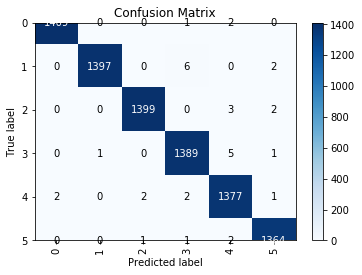

In [318]:
scikitplot.metrics.plot_confusion_matrix(y_train11, y_pred,x_tick_rotation=90)
plt.show()

### Confusion matrix for unknown dataset

In [319]:
y_pre = model.predict(x_cv)
y_pred = np.argmax(y_pre, axis=1)
y_cv11 = np.argmax(y_cv, axis=1)

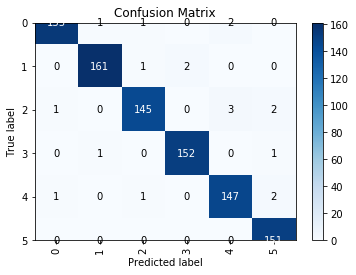

In [320]:
scikitplot.metrics.plot_confusion_matrix(y_cv11, y_pred,x_tick_rotation=90)
plt.show()